In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


Text(0, 0.5, 'Sell Price')

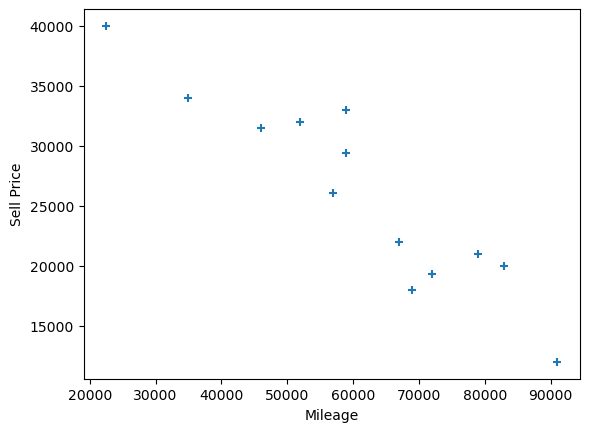

In [2]:
#First of all identify that which model is gonna suited 
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["Mileage"],df["Sell Price($)"],marker="+")
plt.xlabel("Mileage")
plt.ylabel("Sell Price")

In [3]:
# As we can see there is a clear linear relation bw mileage and prices, so we can apply Linear Regression here.

In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [5]:
pd.get_dummies(df["Car Model"])

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [6]:
le=LabelEncoder()
df["Car Model"]=le.fit_transform(df["Car Model"])
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [7]:
x=df.drop("Sell Price($)",axis=1)
x

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [8]:
y=df["Sell Price($)"]
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [9]:
from sklearn.compose import ColumnTransformer
ohe=ColumnTransformer(transformers=[("oneHotEncoding",OneHotEncoder(),[0])],remainder="passthrough")

In [10]:
x=ohe.fit_transform(x).tolist()
x

[[0.0, 1.0, 0.0, 69000.0, 6.0],
 [0.0, 1.0, 0.0, 35000.0, 3.0],
 [0.0, 1.0, 0.0, 57000.0, 5.0],
 [0.0, 1.0, 0.0, 22500.0, 2.0],
 [0.0, 1.0, 0.0, 46000.0, 4.0],
 [1.0, 0.0, 0.0, 59000.0, 5.0],
 [1.0, 0.0, 0.0, 52000.0, 5.0],
 [1.0, 0.0, 0.0, 72000.0, 6.0],
 [1.0, 0.0, 0.0, 91000.0, 8.0],
 [0.0, 0.0, 1.0, 67000.0, 6.0],
 [0.0, 0.0, 1.0, 83000.0, 7.0],
 [0.0, 0.0, 1.0, 79000.0, 7.0],
 [0.0, 0.0, 1.0, 59000.0, 5.0]]

In [11]:
x=np.delete(x,0,axis=1)
x

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [12]:
from sklearn import linear_model

In [13]:
rg=linear_model.LinearRegression()

In [14]:
rg.fit(x,y)

LinearRegression()

In [15]:
rg.predict([[0,1,45000,4]])

array([36991.31721062])

In [16]:
rg.predict([[0,1,67000,6]])

array([26183.72387885])

In [17]:
rg.score(x,y)

0.9417050937281083

In [18]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
input_classes = ['suzuki', 'ford', 'suzuki', 'toyota', 'ford', 'bmw']
label_encoder.fit(input_classes)
print( "\nClass mapping:")
for i, item in enumerate(label_encoder.classes_):
    print( item, '-->', i)


Class mapping:
bmw --> 0
ford --> 1
suzuki --> 2
toyota --> 3
